In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import interpolate

# Read data from mesa data: 
a = pd.read_excel("ONe6040_helm_update.xlsx")

# Read data after the initial module
f = open("ECSN-ONe6040-final.hse.10240","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')

#for i in range(len(data2d)-1,-1,-1):
#    if len(data2d[i]) == 3:
#        aaaaa = data2d[i].copy()
#        data2d.pop(i)
#        i+=1
#    else:
#        data2d[i].extend(aaaaa)

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f20','he4','al27','si28','s32','p31','h1']
df.head()

df1 = pd.read_excel("/Users/sailor/Desktop/asro_work/test/csv_result/rm_plateo.xlsx")

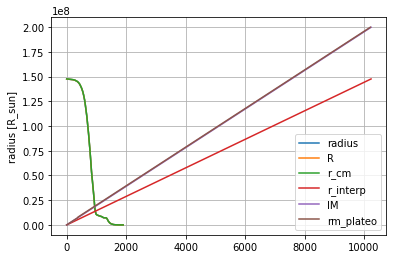

In [43]:
r_sun = 6.955e10  # cm
m_sun = 1.989e33  # gram
radius = np.array(a["radius"])
R = np.power(10,np.array(a["logR"]))
r_cm = np.array(a["radius_cm"])

r_interp = np.linspace(radius[-1], radius[ 0], 10240)

plt.plot(radius*r_sun, label='radius')
plt.plot(R*r_sun, label='R')
plt.plot(r_cm, label='r_cm')
plt.plot(r_interp*r_sun, label='r_interp')


plt.plot(np.array(df['radius']), label='IM')
plt.plot(df1['radius'],label='rm_plateo')


plt.legend()
plt.xlabel("")
plt.ylabel("radius [R_sun]")
plt.grid()
plt.show()

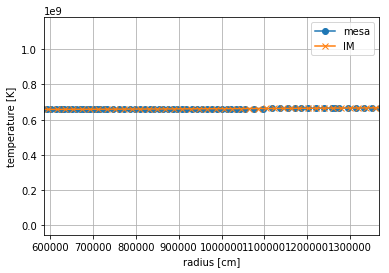

In [3]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

#T_interp = np.interp(r_interp, radius[::-1], temp[::-1])
f_interp = interpolate.interp1d(radius[::-1],temp[::-1],kind='nearest')
T_interp = f_interp(r_interp)

plt.plot(radius*r_sun,temp,'o-',label='mesa')
plt.plot(np.array(df['radius']),np.array(df['temperature']), "x-",label='IM')
#plt.plot(r_interp*r_sun,T_interp,'s-',label='interp')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")

#plt.xlim(7.23e6,7.30e6)
plt.xlim(585937.5,1367187.5)
#plt.xlim(0,2.5e79
#plt.ylim(0.88e9,1.2e9)
plt.grid()
plt.legend()
plt.show()

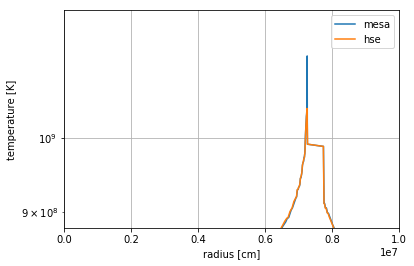

In [46]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

T_interp = np.interp(r_interp, radius[::-1], temp[::-1])

plt.semilogy(radius*r_sun,temp,'-', label='mesa')
#plt.semilogy(R*r_sun,T,":")
#plt.semilogy(r_interp,T_interp)

plt.semilogy(np.array(df['radius']),np.array(df['temperature']), "-",label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")
#plt.xlim(7.2e6,8e6)
#plt.xlim(585937.5,1367187.5)
plt.ylim(0.88e9,1.2e9)
plt.xlim(0.4,1e7)
plt.legend()
plt.grid()
#plt.show()
plt.savefig("temp_initial model")

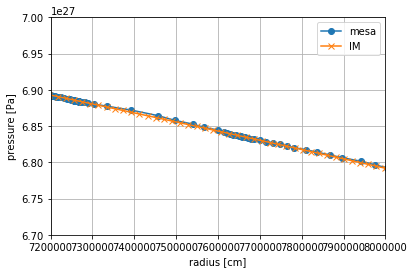

In [5]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.plot(R*r_sun,pressure, "o-",label='mesa')
#plt.plot(R*r_sun,P)
#plt.plot(r_interp*r_sun,p_interp)

plt.plot(np.array(df['radius']),np.array(df['pressure']),"x-",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")

#plt.xlim(0,1000000)
plt.ylim(6.7e27,7e27)
plt.xlim(7.2e6,8e6)
#plt.ylim(0.88e9,1.2e9)
plt.legend()
plt.grid()
#plt.show()
#plt.savefig("pressure_initial_model")

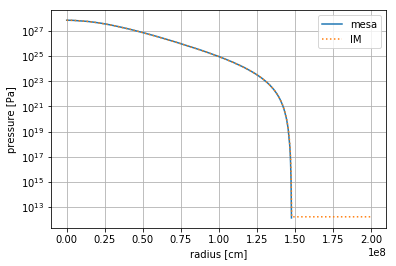

In [6]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.semilogy(R*r_sun,pressure,label='mesa')
#plt.semilogy(R*r_sun,P)
#plt.semilogy(r_interp*r_sun,p_interp)

plt.semilogy(np.array(df['radius']),np.array(df['pressure']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")
plt.legend()
#plt.ylim(5e20,2e28)
plt.grid()
plt.show()

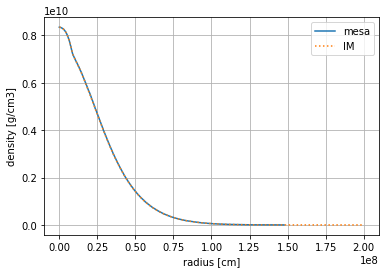

In [7]:
rho = np.power(10,np.array(a["logRho"]))

plt.plot(radius*r_sun,rho,label='mesa')

plt.plot(np.array(df['radius']),np.array(df['density']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.legend()
plt.grid()
plt.show()

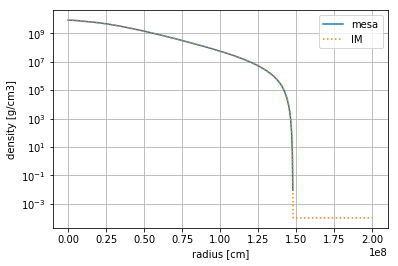

In [8]:
plt.semilogy(radius*r_sun,rho,label='mesa')

plt.semilogy(np.array(df['radius']),np.array(df['density']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.grid()
plt.legend()
plt.show()

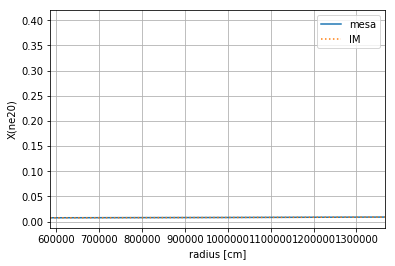

In [9]:
element = 'ne20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

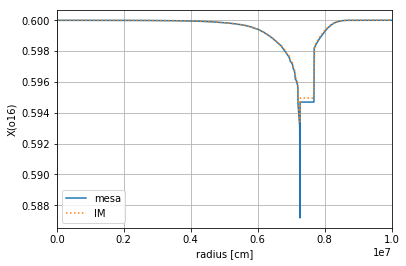

In [39]:
element = 'o16'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(7.2e6,7.8e6)
#plt.xlim(585937.5,1367187.5)
plt.xlim(0.4,1e7)
plt.grid()
plt.legend()
plt.show()

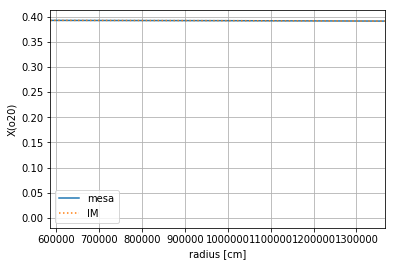

In [11]:
element = 'o20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(7.2e6,7.8e6)
plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

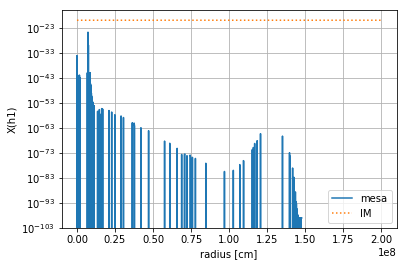

In [12]:
element = 'h1'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.savefig("X(h1).png")

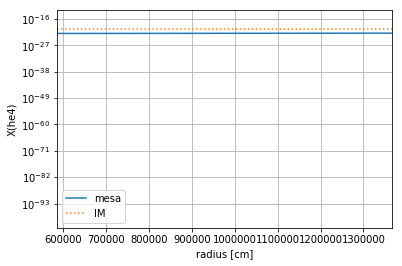

In [13]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(7.2e6,7.8e6)
#plt.ylim(1e-19,1e-16)
plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

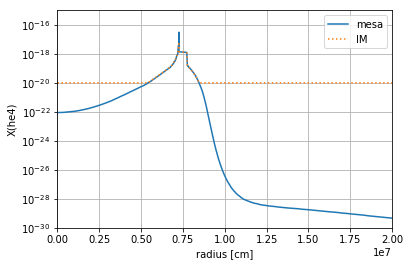

In [33]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.xlim(0,0.2e8)
plt.ylim(1e-30,1e-15)
plt.savefig("X(he4).png")

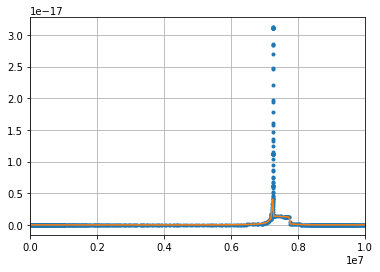

In [36]:
from scipy import interpolate
element = 'he4'
x = radius*r_sun
y = y_axis = np.array(a[element])
f = interpolate.interp1d(x, y)
xnew = np.linspace(x[0], x[-1], 5120)
ynew = f(xnew)
plt.plot(x, y, '.', xnew, ynew, '-')
plt.xlim(0.4,0.1e8)
plt.grid()

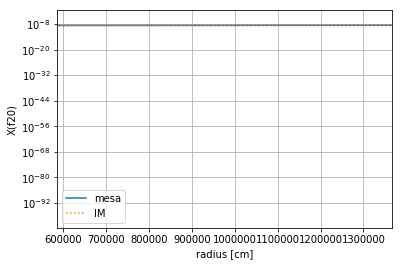

In [15]:
element = 'f20'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.savefig("X(f20).png")

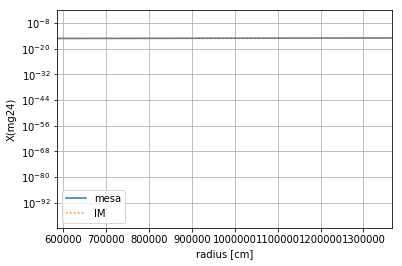

In [16]:
element = 'mg24'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.xlim(585937.5,1367187.5)
plt.legend()
plt.savefig("X(mg24).png")

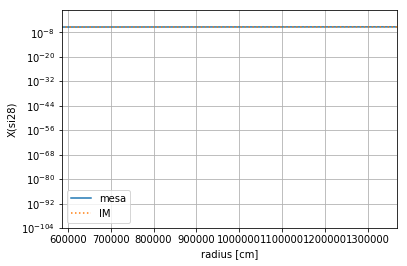

In [17]:
element = 'si28'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.savefig("X(si28).png")

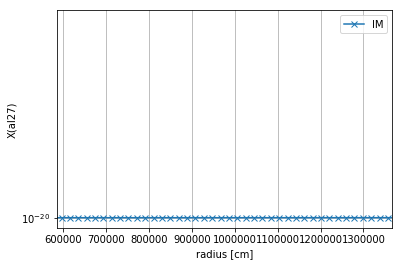

In [18]:
element = 'al27'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),'x-',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(7.2e6,7.8e6)
plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

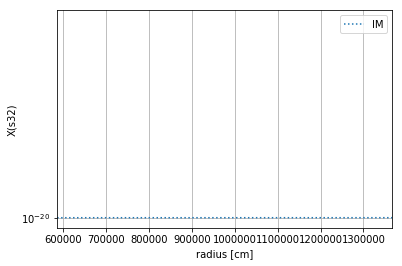

In [19]:
element = 's32'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

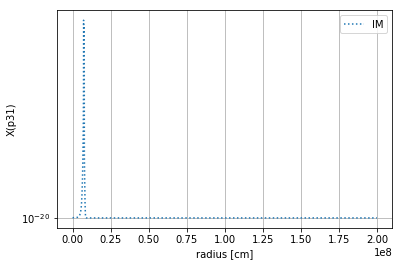

In [20]:
element = 'p31'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

In [21]:
df.head()

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
0,9765.625,8.348567e+09,6.565860e+08,7.367389e+27,0.007297,0.599995,0.392705,4.965025e-16,2.021118e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
1,29296.875,8.348559e+09,6.565903e+08,7.367381e+27,0.007298,0.599995,0.392704,4.966412e-16,2.021281e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
2,48828.125,8.348544e+09,6.565989e+08,7.367366e+27,0.007299,0.599995,0.392703,4.969187e-16,2.021606e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
3,68359.375,8.348521e+09,6.566118e+08,7.367344e+27,0.007301,0.599995,0.392701,4.973350e-16,2.022094e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20
4,87890.625,8.348490e+09,6.566291e+08,7.367314e+27,0.007303,0.599995,0.392699,4.978909e-16,2.022745e-09,1.000000e-20,1.000000e-20,0.000004,1.000000e-20,1.000000e-20,1.000000e-20


In [40]:
df.to_csv("/Users/sailor/Desktop/asro_work/test/csv_result/rm_plateo.csv",index = False)

In [25]:
df.shape[0]

10240

In [48]:
a[100:200]

,zone,logT,logRho,logP,logR,luminosity,conv_vel,grav,eps_grav,log_abs_eps_grav_dm_div_L,...,delta_T,delta_rho,delta_eps_nuc,delta_mu,nz_minus_k,eps_nuc_mc2,eps_nuc_neu,eps_nuc_eos,log_rate_r_n20_wk_f20,log_rate_r1616
100,101,7.077129,0.443327,15.192492,-2.673766,703.749063,0.0,8.494150e+09,3.343517e+11,-3.697520,...,70.199903,-0.000013,7.533613e-150,-2.391370e-09,1801,2.288273e-146,0.0,-5.334621e-161,-99.0,-99.0
101,102,7.081616,0.459531,15.213077,-2.673772,703.607843,0.0,8.494396e+09,3.211674e+11,-3.413875,...,71.185665,-0.000013,1.413484e-149,-2.182052e-09,1800,4.293312e-146,0.0,-8.891035e-161,-99.0,-99.0
102,103,7.087265,0.480032,15.239092,-2.673784,703.336539,0.0,8.494870e+09,3.052454e+11,-3.435790,...,72.441340,-0.000014,3.113074e-149,-1.935299e-09,1799,9.456224e-146,0.0,-1.956028e-160,-99.0,-99.0
103,104,7.092609,0.499360,15.263638,-2.673796,703.078686,0.0,8.495323e+09,2.909621e+11,-3.456444,...,73.645055,-0.000015,6.548453e-149,-1.720135e-09,1798,1.989391e-145,0.0,-4.267697e-160,-99.0,-99.0
104,105,7.097048,0.515422,15.284036,-2.673807,702.832898,0.0,8.495756e+09,2.796106e+11,-3.598513,...,74.657724,-0.000015,1.211908e-148,-1.553994e-09,1797,3.682213e-145,0.0,-6.401545e-160,-99.0,-99.0
105,106,7.100710,0.528597,15.300790,-2.673815,702.655749,0.0,8.496069e+09,2.706590e+11,-3.612535,...,75.501985,-0.000016,2.010169e-148,-1.425962e-09,1796,6.108417e-145,0.0,-1.422566e-159,-99.0,-99.0
106,107,7.105995,0.547401,15.324769,-2.673823,702.484271,0.0,8.496373e+09,2.584074e+11,-3.331517,...,76.734904,-0.000017,4.160802e-148,-1.255137e-09,1795,1.264646e-144,0.0,-2.845131e-159,-99.0,-99.0
107,108,7.110949,0.565288,15.347497,-2.673838,702.156840,0.0,8.496955e+09,2.472496e+11,-3.651513,...,77.905337,-0.000017,8.211927e-148,-1.106379e-09,1794,2.496584e-144,0.0,-5.690262e-159,-99.0,-99.0
108,109,7.114139,0.576683,15.362014,-2.673845,702.000194,0.0,8.497234e+09,2.404121e+11,-3.663596,...,78.666083,-0.000018,1.270249e-147,-1.017725e-09,1793,3.862565e-144,0.0,-9.673446e-159,-99.0,-99.0
109,110,7.118767,0.593053,15.382920,-2.673852,701.847879,0.0,8.497506e+09,2.309660e+11,-3.379880,...,79.778891,-0.000019,2.386290e-147,-8.984797e-10,1792,7.258600e-144,0.0,-1.593273e-158,-99.0,-99.0
